In [2]:
import cv2 
cv2.__version__


'4.9.0'

# TASK 1 SAVE LUNA !

# Importing image

In [3]:
import cv2 
image = cv2.imread('table.png')


# Using Sobel Operator

In [139]:
image=cv2.imread('table.png',cv2.IMREAD_GRAYSCALE)
#performing edge detection 
gradients_sobelx = cv2.Sobel(image,-1,1,0)
gradients_sobely= cv2.Sobel(image,-1,0,1)
gradients_sobelxy= cv2.addWeighted(gradients_sobelx,0.5,gradients_sobely ,0.5,0)

# cv2.imshow('Sobel x',gradients_sobelx)
# cv2.imshow('Sobel y',gradients_sobely)
resize=cv2.resize(gradients_sobelxy,(500,500))
cv2.imshow('Sobel xy',resize)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Using Laplacian Operator

In [132]:
gradients_laplacian= cv2.Laplacian(image,-1)
cv2.imshow('Laplacian',gradients_laplacian)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Using Canny Edge Detector

In [142]:
canny_output = cv2.Canny(image, 80, 100)
resized = cv2.resize(canny_output,(500,500))
cv2.imshow('Canny',resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Hough Transform

In [143]:
import cv2
import numpy as np
import math


image1 = cv2.imread('table.png', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image1,150,255,cv2.THRESH_BINARY)
cdst = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)

# Standard Hough Line Transform
lines = cv2.HoughLines(canny_output, 1, np.pi / 180, 150, None, 0, 0)
# print(lines)
# Draw the lines
if lines is not None:
    for i in range(len(lines)):
        rho, theta = lines[i ][0]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(cdst, pt1, pt2, (0, 0, 255), 3, cv2.LINE_AA)

# Show results
# cv2.imshow("Detected Lines - Standard Hough Line Transform", cdst)
# resized_image = cv2.resize(cdst, (500,500))
cv2.imshow('Image',resized_image)
# Wait and Exit
cv2.waitKey(0)
cv2.destroyAllWindows()


# Heatmap or colormap of Environment

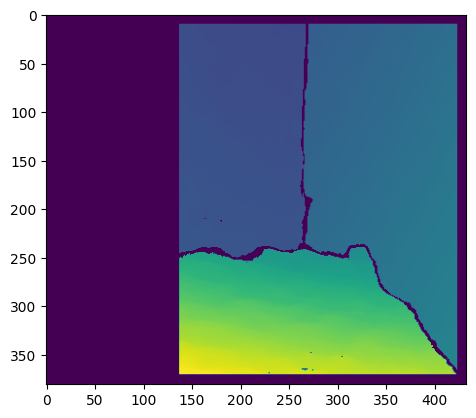

In [44]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# read two input images
imgL = cv2.imread('left.png',0)
imgR = cv2.imread('right.png',0)

# Initiate and StereoBM object
stereo = cv2.StereoBM_create(numDisparities=128,blockSize=21)

# compute the disparity map
disparity = stereo.compute(imgL,imgR)
disparity1 = stereo.compute(imgR,imgL)
plt.imshow(disparity)
plt.show()

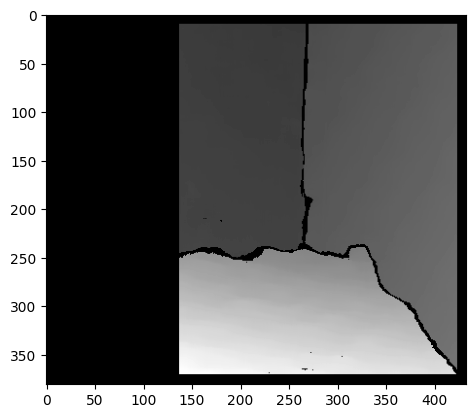

In [46]:
plt.imshow(disparity,'gray')
plt.show()

# TASK 2 Implementing Path Planning with Probabilistic Roadmaps (PRM)

# Importing maze and idetify obstacles

In [2]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('maze.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a binary inverse threshold
# This step enhances the black lines on a white background
threshold_value = 200  # Adjust this value based on your image lighting conditions
_, thresh = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY_INV)

# Use Canny edge detection
edges = cv2.Canny(thresh, 50, 150, apertureSize=3)

# Detect lines using the Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=80, maxLineGap=10)

# Draw lines on the image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the result
cv2.imshow('Detected Lines', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Finding coordinates of start and end

In [3]:
import cv2 

# function to display the coordinates of 
# of the points clicked on the image 
def click_event(event, x, y, flags, params): 

	# checking for left mouse clicks 
	if event == cv2.EVENT_LBUTTONDOWN: 

		# displaying the coordinates 
		# on the Shell 
		print(x, ' ', y) 

		# displaying the coordinates 
		# on the image window 
		font = cv2.FONT_HERSHEY_SIMPLEX 
		cv2.putText(img, str(x) + ',' +
					str(y), (x,y), font, 
					1, (255, 0, 0), 2) 
		cv2.imshow('image', img) 

	# checking for right mouse clicks	 
	if event==cv2.EVENT_RBUTTONDOWN: 

		# displaying the coordinates 
		# on the Shell 
		print(x, ' ', y) 

		# displaying the coordinates 
		# on the image window 
		font = cv2.FONT_HERSHEY_SIMPLEX 
		b = img[y, x, 0] 
		g = img[y, x, 1] 
		r = img[y, x, 2] 
		cv2.putText(img, str(b) + ',' +
					str(g) + ',' + str(r), 
					(x,y), font, 1, 
					(255, 255, 0), 2) 
		cv2.imshow('image', img) 

# driver function 
if __name__=="__main__": 

	# reading the image 
	img = cv2.imread('maze.png', 1) 

	# displaying the image 
	cv2.imshow('image', img) 

	# setting mouse handler for the image 
	# and calling the click_event() function 
	cv2.setMouseCallback('image', click_event) 

	# wait for a key to be pressed to exit 
	cv2.waitKey(0) 

	# close the window 
	cv2.destroyAllWindows() 


51   322
106   334
35   347
164   20
447   311


# Implementing PRM algorithm

In [4]:
import cv2
import numpy as np
import random
import networkx as nx

# Load the maze image
maze_image = cv2.imread('maze.png', cv2.IMREAD_GRAYSCALE)

# Threshold the image to binary (black and white)
_, binary_image = cv2.threshold(maze_image, 127, 255, cv2.THRESH_BINARY)

# Generate random nodes within free space
def generate_random_node(binary_image):
    h, w = binary_image.shape
    while True:
        x = random.randint(0, w - 1)
        y = random.randint(0, h - 1)
        if binary_image[y, x] == 0:  # Check if it's a free space
            return x, y

# Generate k-nearest neighbors for each node
def generate_neighbors(nodes, k, radius):
    G = nx.Graph()
    for node in nodes:
        G.add_node(node)
        for other_node in nodes:
            if node != other_node and np.linalg.norm(np.array(node) - np.array(other_node)) <= radius:
                G.add_edge(node, other_node)
    return G

# Check if the edge between two nodes is valid
def is_edge_valid(node1, node2, binary_image):
    x1, y1 = node1
    x2, y2 = node2
    pts = np.linspace([x1, y1], [x2, y2], num=100).astype(int)
    for pt in pts:
        x, y = pt
        if binary_image[y, x] == 0:  # If it's an obstacle
            return False
    return True

# Find a path using A* algorithm
def find_path(graph, start, goal):
    try:
        return nx.astar_path(graph, start, goal)
    except nx.NetworkXNoPath:
        print("No path found.")
        return []

# Draw the path on the maze image
def draw_path(maze_image, path):
    for i in range(len(path) - 1):
        cv2.line(maze_image, path[i], path[i + 1], (0, 255, 0), 2)
    return maze_image

# PRM algorithm
def prm(binary_image, num_nodes, k_nearest, connect_radius):
    nodes = [generate_random_node(binary_image) for _ in range(num_nodes)]
    graph = generate_neighbors(nodes, k_nearest, connect_radius)
    start = nodes[0]
    goal = nodes[-1]
    path = find_path(graph, start, goal)
    return path

# Parameters
num_nodes = 100
k_nearest = 5
connect_radius = 30

# Run PRM algorithm
path = prm(binary_image, num_nodes, k_nearest, connect_radius)

# Draw the path on the maze image
maze_image_with_path = draw_path(maze_image.copy(), path)

# Display the result
cv2.imshow('Maze with Path', maze_image_with_path)
cv2.waitKey(0)
cv2.destroyAllWindows()



No path found.


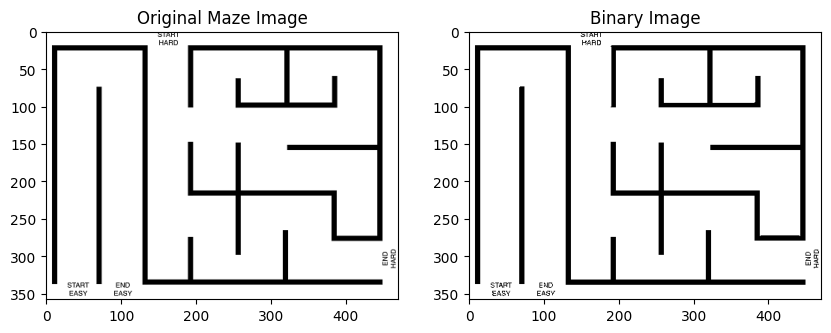

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the maze image
maze_image = cv2.imread('maze.png', cv2.IMREAD_GRAYSCALE)

# Threshold the image to binary
_, binary_image = cv2.threshold(maze_image, 127, 255, cv2.THRESH_BINARY)

# Display the original and binary images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(maze_image, cmap='gray')
plt.title('Original Maze Image')
plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.show()


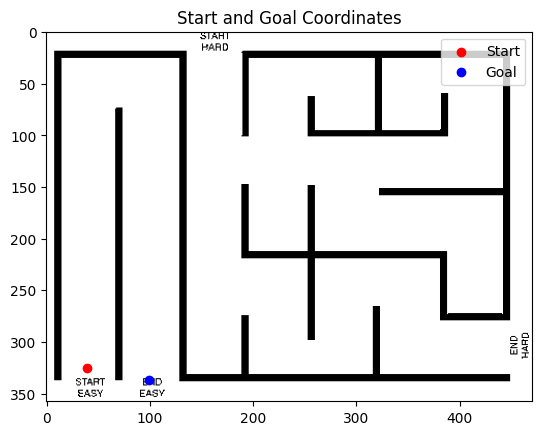

In [18]:
# Manually define the start and goal coordinates (x, y)
start_coords = (39,325)  # Adjust as per your maze
goal_coords = (99,337)  # Adjust as per your maze

# Display the start and goal coordinates on the binary image
plt.imshow(binary_image, cmap='gray')
plt.scatter(start_coords[0], start_coords[1], c='red', marker='o', label='Start')
plt.scatter(goal_coords[0], goal_coords[1], c='blue', marker='o', label='Goal')
plt.legend()
plt.title('Start and Goal Coordinates')
plt.show()


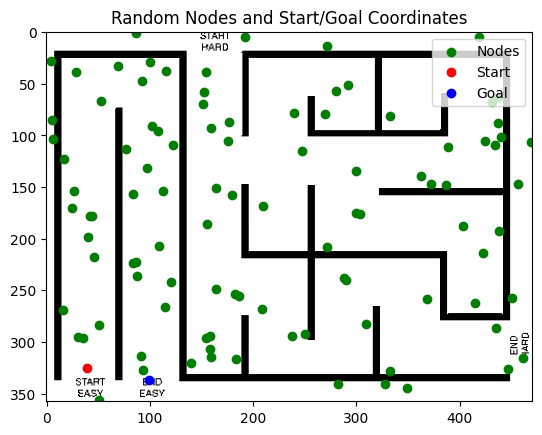

In [33]:
import random

# Function to generate random nodes within the free space of the maze
def generate_random_node(binary_image):
    h, w = binary_image.shape
    while True:
        x = random.randint(0, w - 1)
        y = random.randint(0, h - 1)
        if binary_image[y, x] == 255:  # Check if it's free space
            return x, y

# Generate random nodes
num_nodes = 100
nodes = [generate_random_node(binary_image) for _ in range(num_nodes)]

# Display the random nodes on the binary image
plt.imshow(binary_image, cmap='gray')
plt.scatter([node[0] for node in nodes], [node[1] for node in nodes], c='green', marker='o', label='Nodes')
plt.scatter(start_coords[0], start_coords[1], c='red', marker='o', label='Start')
plt.scatter(goal_coords[0], goal_coords[1], c='blue', marker='o', label='Goal')
plt.legend()
plt.title('Random Nodes and Start/Goal Coordinates')
plt.show()


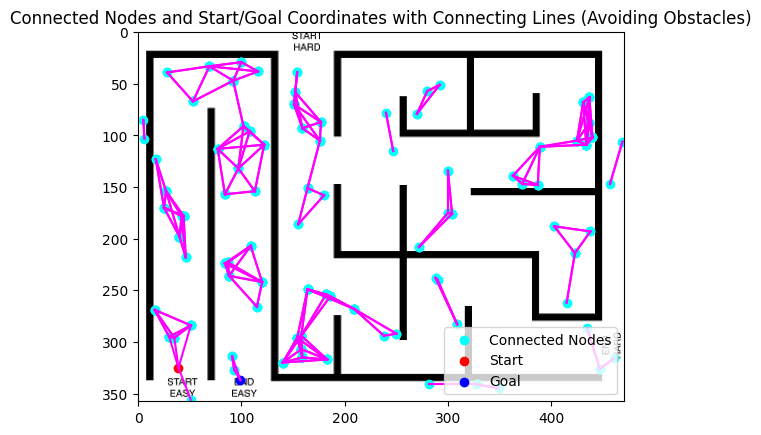

In [42]:
import math
import matplotlib.pyplot as plt

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Function to check if a line segment intersects with black pixels in the maze image
def intersects_obstacle(image, point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    # Bresenham's line algorithm
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = -1 if x1 > x2 else 1
    sy = -1 if y1 > y2 else 1
    err = dx - dy
    while True:
        if image[y1, x1] == 0:  # If the pixel is black (obstacle)
            return True
        if (x1, y1) == (x2, y2):  # If we reached the end point
            break
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy
    return False

# Function to connect neighboring nodes within a specified radius without intersecting obstacles
def connect_nodes(nodes, start_coords, goal_coords, radius, maze_image):
    connected_nodes = []
    lines = []  # List to store the lines connecting nodes
    for node in nodes:
        # Connect the node with start and goal if within radius and without intersecting obstacles
        if (euclidean_distance(node, start_coords) <= radius and
            not intersects_obstacle(maze_image, node, start_coords)):
            connected_nodes.append((node, start_coords))
            lines.append((node, start_coords))
        if (euclidean_distance(node, goal_coords) <= radius and
            not intersects_obstacle(maze_image, node, goal_coords)):
            connected_nodes.append((node, goal_coords))
            lines.append((node, goal_coords))
        # Connect the node with other nodes if within radius and without intersecting obstacles
        for other_node in nodes:
            if node != other_node and euclidean_distance(node, other_node) <= radius:
                if not intersects_obstacle(maze_image, node, other_node):
                    connected_nodes.append((node, other_node))
                    lines.append((node, other_node))
    return connected_nodes, lines

# Define the connection radius
connect_radius = 50  

# Connect neighboring nodes without intersecting obstacles
connected_nodes, lines = connect_nodes(nodes, start_coords, goal_coords, connect_radius, maze_image)

# Display the connected nodes and lines on the binary image
plt.imshow(maze_image, cmap='gray')
plt.scatter([node[0][0] for node in connected_nodes], [node[0][1] for node in connected_nodes], c='cyan', marker='o', label='Connected Nodes')
for line in lines:
    plt.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], c='magenta')  # Draw lines between connected nodes
plt.scatter(start_coords[0], start_coords[1], c='red', marker='o', label='Start')
plt.scatter(goal_coords[0], goal_coords[1], c='blue', marker='o', label='Goal')
plt.legend()
plt.title('Connected Nodes and Start/Goal Coordinates with Connecting Lines (Avoiding Obstacles)')
plt.show()

In [24]:
prm = mobileRobotPRM()
prm.NumNodes = 50
prm.ConnectionDistance = 80
prm.Map = image_maze
show(prm)
disp('Click for the Start Location')
startLocation=ginput(1)
disp('Click for the Goal Location');
endLocation=ginput(1)
path=findpath(prm,startLocation,endLocation)
while isempty(path):
    prm.Numbers=prm.Numnodes+20;
    update(prm)
    path=findpath(prm,startLocation,endLocation)
    show(prm)
    pause(1)
    end

NameError: name 'mobileRobotPRM' is not defined

NodeNotFound: Either source (42, 343) or target (106, 348) is not in G

In [34]:
from autonavsim2d.autonavsim2d import AutoNavSim2D

nav = AutoNavSim2D(
    custom_planner='default', 
    custom_motion_planner='default',
    window='amr'
)
nav.run()

pygame 2.5.2 (SDL 2.28.3, Python 3.11.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


IndexError: list index out of range

#                                                                        TASK 3                       

# MAP GENERATION

In [7]:
from mazelib import Maze
from mazelib.generate.Prims import Prims
import numpy as np
import cv2
import random

WINDOW_WIDTH = 51


def generateMap():
    m = Maze()
    m.set_seed(random.seed())
    m.generator = Prims(70, 70)
    m.generate()


    maze_init = m.grid
    maze_init = maze_init.astype(np.float32)

    scale_factor = 4
    width = int(maze_init.shape[1] * scale_factor)
    height = int(maze_init.shape[0] * scale_factor)
    dim = (width, height)
    resized = cv2.resize(maze_init, dim, interpolation=cv2.INTER_NEAREST)

    kernel = np.ones((3, 3), np.uint8)
    resized = cv2.dilate(resized, kernel, 2)
    resized = cv2.copyMakeBorder(
        resized,
        WINDOW_WIDTH // 2,
        WINDOW_WIDTH // 2,
        WINDOW_WIDTH // 2,
        WINDOW_WIDTH // 2,
        cv2.BORDER_CONSTANT,
    )

    start = generateRandomStart(resized)
    i, j = start
    window = resized[
        i - WINDOW_WIDTH // 2 : i + WINDOW_WIDTH // 2 + 1,
        j - WINDOW_WIDTH // 2 : j + WINDOW_WIDTH // 2 + 1,
    ]

    print(list(reversed(start)))

    for i in range(3):
        x = np.random.randint(WINDOW_WIDTH + 1, len(resized) - WINDOW_WIDTH - 1)
        y = np.random.randint(WINDOW_WIDTH + 1, len(resized) - WINDOW_WIDTH - 1)

        resized[x : x + WINDOW_WIDTH, y : y + WINDOW_WIDTH] = window

    return resized, start


def generateRandomStart(Map):
    x = np.where(Map > 0)
    free_list = np.asarray(x).T
    con = True
    start = [0,0]
    while con:
        if start[0] < WINDOW_WIDTH or start[1] > len(Map) - WINDOW_WIDTH:
            start = random.choice(free_list)
        else:
            con = False
    return start

# Utilis

In [8]:
from MapGeneration import generateMap, WINDOW_WIDTH
class Player:
    def __init__(self):
        self.__Map, self.__position = generateMap()

    def move_horizontal(self, n_pixels):
        i, j = self.__position

        left_first = j - 1
        right_first = j + 1

        while self.__Map[i][left_first] > 0:
            left_first -= 1
        while self.__Map[i][right_first] > 0:
            right_first += 1

        new_pos = (i, j)

        if n_pixels > 0:
            if j + n_pixels < right_first:
                new_pos = (i, j + n_pixels)
            else:
                new_pos = (i, right_first - 1)
        elif n_pixels < 0:
            if j + n_pixels > left_first:
                new_pos = (i, j + n_pixels)
            else:
                new_pos = (i, left_first + 1)

        self.__position = new_pos
        return new_pos[1] - j

    def move_vertical(self, n_pixels):
        i, j = self.__position

        top_first = i - 1
        bottom_first = i + 1

        while self.__Map[top_first][j] > 0:
            top_first -= 1
        while self.__Map[bottom_first][j] > 0:
            bottom_first += 1

        new_pos = (i, j)

        if n_pixels > 0:
            if i + n_pixels < bottom_first:
                new_pos = (i + n_pixels, j)
            else:
                new_pos = (bottom_first - 1, j)
        elif n_pixels < 0:
            if i + n_pixels > top_first:
                new_pos = (i + n_pixels, j)
            else:
                new_pos = (top_first + 1, j)

        self.__position = new_pos
        return new_pos[0] - i

    def getMap(self):
        return self.__Map

    def getSnapShot(self):
        i, j = self.__position
        return self.__Map[
            i - WINDOW_WIDTH // 2 : i + WINDOW_WIDTH // 2 + 1,
            j - WINDOW_WIDTH // 2 : j + WINDOW_WIDTH // 2 + 1,
        ]

# Player

In [16]:

from utils import Player, WINDOW_WIDTH
import cv2
import numpy as np


player = Player()
 


def strategy():
  


    player = Player()
    map_image = np.array(player.getMap()) * 255  # Convert map to grayscale image for visualization

    # Capture the snapshot
    snapshot_image = np.array(player.getSnapShot()) * 255

    # Perform template matching
    result = cv2.matchTemplate(map_image, snapshot_image, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    best_match_loc = max_loc

    # Display the matched location on the map
    map_with_match = cv2.cvtColor(map_image, cv2.COLOR_GRAY2BGR)
    cv2.rectangle(map_with_match, best_match_loc, (best_match_loc[0] + WINDOW_WIDTH, best_match_loc[1] + WINDOW_WIDTH), (0, 0, 255), 2)

    # Save the map with the matched location
    cv2.imwrite("map_with_match.png", map_with_match)

    return best_match_loc

if __name__ == "__main__":
    best_match_loc = strategy()
    print("Best match location:", best_match_loc)
    num_moves = 100
    moves = 0


    while moves < num_moves:
        # 0: up, 1: down, 2: left, 3: right
        direction = random.choise(0,1,2,3)
        step_size = 1

        if direction == 0:
            player.move_vertical(-step_size)  # Move up
        elif direction == 1:
            player.move_vertical(step_size)   # Move down
        elif direction == 2:
            player.move_horizontal(-step_size) # Move left
        elif direction == 3:
            player.move_horizontal(step_size)  # Move right

        moves += 1
    # This function is to localize the position of the newly created player with respect to the map
    pass


if __name__ == "__main__":
    strategy()
    map = np.array(player.getMap())
    im=cv2.imwrite("map.png", map * 255)
    

    snap = np.array(player.getSnapShot())
    cv2.imwrite("snapshot.png", snap * 255)

AttributeError: 'Maze' object has no attribute 'run'

No easy path found!
